In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

In [ ]:
fh=open("wiki-Vote.txt",'rb')
G=nx.read_adjlist(fh, nodetype=int)
fh.close()
G

In [41]:
G=nx.fast_gnp_random_graph(100,0.07,directed=True)

In [29]:
def largest_node(centrality):
    return list(reversed(sorted((value, node)
                                for (node, value) in centrality.items())))[0][1]

In [4]:
def shortest_vector(Graph,node):
    I_dict=nx.single_source_shortest_path_length(Graph,node)
    A_list=np.array(list(I_dict.items()))
    A_list.sort()
    return (A_list)

In [38]:
def calculate_propagation(ADJ):
    temp = 0
    check = 0
    ADJ_return = np.zeros((ADJ.max(0)[0],2))
    for (first, last) in ADJ:
        temp = temp+1
        if check < first:
            check=check+1
            print(f'Step{first:3d} is Propagated {temp/len(ADJ)*100:3.2f}%')
            ADJ_return[first-1]=(first,temp/len(ADJ))
    return (ADJ_return)

In [44]:
def centralitypropagation(G):
    DEGREE_CENTRALITY = nx.degree_centrality(G)
    CLOSENESS_CENTRALITY = nx.closeness_centrality(G)
    BETWEENNESS_CENTRALITY = nx.betweenness_centrality(G)
    PAGERANK_CENTRALITY = nx.pagerank(G)
    
    DEGREE_CENTRALITY_NODE = largest_node(DEGREE_CENTRALITY)
    CLOSENESS_CENTRALITY_NODE = largest_node(CLOSENESS_CENTRALITY)
    BETWEENNESS_CENTRALITY_NODE = largest_node(BETWEENNESS_CENTRALITY)
    PAGERANK_CENTRALITY_NODE = largest_node(PAGERANK_CENTRALITY)
    
    print(f'Degree centralrity node is {DEGREE_CENTRALITY_NODE:3d}')
    print(f'Closeness centralrity node is {CLOSENESS_CENTRALITY_NODE:3d}')
    print(f'Betweenness centralrity node is {BETWEENNESS_CENTRALITY_NODE:3d}')
    print(f'Pagerank centralrity node is {PAGERANK_CENTRALITY_NODE:3d}')
    
    Adj_DEGREE = shortest_vector(G,DEGREE_CENTRALITY_NODE)
    Adj_CLOSENESS = shortest_vector(G,CLOSENESS_CENTRALITY_NODE)
    Adj_BETWEENNESS = shortest_vector(G,BETWEENNESS_CENTRALITY_NODE)
    Adj_PAGERANK = shortest_vector(G,PAGERANK_CENTRALITY_NODE)
    
    Result_DEGREE = calculate_propagation(Adj_DEGREE)
    Result_CLOSENESS = calculate_propagation(Adj_CLOSENESS)
    Result_BETWEENNESS = calculate_propagation(Adj_BETWEENNESS)
    Result_PAGERANK = calculate_propagation(Adj_PAGERANK)
   

    plt.title("Ratio")
    plt.plot(np.transpose(Result_DEGREE)[0],np.transpose(Result_DEGREE)[1],marker='o',color='r',label='DEGREE')
    plt.plot(np.transpose(Result_CLOSENESS)[0],np.transpose(Result_CLOSENESS)[1],marker='v',color='b',label='CLOSENESS')
    plt.plot(np.transpose(Result_BETWEENNESS)[0],np.transpose(Result_BETWEENNESS)[1],marker='^',color='green',label='BETWEENNESS')
    plt.plot(np.transpose(Result_PAGERANK)[0],np.transpose(Result_PAGERANK)[1],marker='<',color='gray',label='PAGERANK')
    plt.xlabel('Step')
    plt.ylabel('Propagated ratio')
    plt.legend(loc=2)
    plt.show()

Degree centralrity node is  25
Closeness centralrity node is  61
Betweenness centralrity node is   7
Pagerank centralrity node is  61
Step  1 is Propagated 2.00%
Step  2 is Propagated 14.00%
Step  3 is Propagated 66.00%
Step  1 is Propagated 2.00%
Step  2 is Propagated 4.00%
Step  3 is Propagated 14.00%
Step  4 is Propagated 60.00%
Step  5 is Propagated 100.00%
Step  1 is Propagated 3.00%
Step  2 is Propagated 13.00%
Step  3 is Propagated 63.00%
Step  1 is Propagated 2.00%
Step  2 is Propagated 4.00%
Step  3 is Propagated 14.00%
Step  4 is Propagated 60.00%
Step  5 is Propagated 100.00%


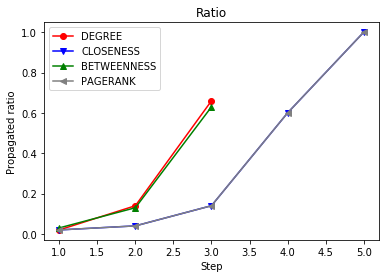

In [45]:
centralitypropagation(G)

In [30]:
largest_node(nx.degree_centrality(G))

70